<a href="https://colab.research.google.com/github/Ragavendhra-Ramanan/Data-Analysis/blob/main/Car_Leasing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM STATEMENT**

* The Dataset was scrapped of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website by user orgesleka .
* The Goal of this dataset is to predict the "Price" of cars given the various features .




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import re
from scipy.stats import boxcox
import scipy.stats
import statsmodels.api as sm
from scipy.stats import norm,chi2_contingency,f_oneway,levene,kruskal,spearmanr,mannwhitneyu
from statsmodels.graphics.gofplots import qqplot

# **LOOK ON THE DATASET**

In [2]:
df = pd.read_csv('https://query.data.world/s/xmd6vagrr4ha5nzc5z675rut7l374x?dws=00000',encoding="Latin-1")

In [3]:
df.sample(2)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
92841,2016-04-02 15:38:00,Ford_Focus_1.6_TI_VCT_Trend,privat,Angebot,9900,control,limousine,2012,manuell,105,focus,70000,1,benzin,ford,nein,2016-04-02 00:00:00,0,23923,2016-04-06 14:16:30
279649,2016-03-17 13:47:33,Volkswagen_Golf_Plus_2.0_TDI_DPF_MATCH,privat,Angebot,11500,control,bus,2012,manuell,140,golf,150000,7,diesel,volkswagen,nein,2016-03-17 00:00:00,0,42657,2016-03-31 22:45:52


In [4]:
#get the shape
df.shape

(371528, 20)

* The Dataset has 371528 data points and 20 features.

**ANALYZING EACH COLUMNS**


* **dateCrawled** - When this ad was first crawled.
* **name** - Name of the car.
* **seller** - Whether the seller is private or a dealer.
* **offerType** - The type of listing
* **price** - The price on the ad to sell the car.
* **abtest** - Whether the listing is included in an A/B test.
* **vehicleType** - The vehicle Type.
* **yearOfRegistration** - The year in which the car was first registered.
* **gearbox** - The transmission type.
* **powerPS** - The power of the car in PS.
* **model** - The car model name.
* **kilometer** - How many kilometers the car has driven.
* **monthOfRegistration** - The month in which the car was first registered.
* **fuelType** - What type of fuel the car uses.
* **brand** - The brand of the car.
* **notRepairedDamage** - If the car has a damage which is not yet repaired.
* **dateCreated** - The date on which the eBay listing was created.
* **nrOfPictures** - The number of pictures in the ad.
* **postalCode** - The postal code for the location of the vehicle.
* **lastSeenOnline** - When the crawler saw this ad last online.

In [5]:
#get basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

* 7 features belongs to integer datatypes while the rest 13 features contains object datatype.
* The object datatypes can be integer,string,date or category .This has to be investigated and changed to appropriate datatype.
* Some of the features has null values which has to be handled.

# **DATA CLEANING**
* Duplicate Removal.
* Converting Column Names to Python Standard.
* Corrrecting the DataTypes for Date Features.
* Exploring Basic Statistics to Understand Data and drop unwanted features.
* Analyzing Date Features
* Analyzing Numeric Features
* Analyzing Categorical Features .

## **Duplicate Removal**

In [6]:
df.duplicated().sum()

4

* 4 duplicate rows has been found and hence removing that

In [7]:
#removing duplicate
df=df[~df.duplicated()]

In [8]:
df.shape

(371524, 20)

## **Column Names Conversion**

In [9]:
#get column names
print("Before Renaming")
print(df.columns)
renamed_columns={"dateCrawled":"Ad_Crawled","name":"Car_Name","seller":"Seller_Type","offerType":"Offer_Type","price":"Car_Price","abtest":"Is_AB_Tested","vehicleType":"Vehicle_Type","yearOfRegistration":"Registration_Year","gearbox":"Gearbox_Type","powerPS":"Power_PS","model":"Car_Model","kilometer":"Kilometer_Driven","monthOfRegistration":"Registration_Month","fuelType":"Fuel_Type","brand":"Brand","notRepairedDamage":"Unrepaired_Damage","dateCreated":"Ad_Created","nrOfPictures":"Pictures_In_Ad","postalCode":"PostalCode","lastSeen":"Ad_LastSeen_Online"}
df.rename(columns=renamed_columns,inplace=True)
print("After Renaming")
print(df.columns)

Before Renaming
Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')
After Renaming
Index(['Ad_Crawled', 'Car_Name', 'Seller_Type', 'Offer_Type', 'Car_Price',
       'Is_AB_Tested', 'Vehicle_Type', 'Registration_Year', 'Gearbox_Type',
       'Power_PS', 'Car_Model', 'Kilometer_Driven', 'Registration_Month',
       'Fuel_Type', 'Brand', 'Unrepaired_Damage', 'Ad_Created',
       'Pictures_In_Ad', 'PostalCode', 'Ad_LastSeen_Online'],
      dtype='object')


<ipython-input-9-1c71a6192289>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=renamed_columns,inplace=True)


In [10]:
df.sample(2)

,Ad_Crawled,Car_Name,Seller_Type,Offer_Type,Car_Price,Is_AB_Tested,Vehicle_Type,Registration_Year,Gearbox_Type,Power_PS,Car_Model,Kilometer_Driven,Registration_Month,Fuel_Type,Brand,Unrepaired_Damage,Ad_Created,Pictures_In_Ad,PostalCode,Ad_LastSeen_Online
41702,2016-03-06 01:56:55,Vw_Golf_3_Tuev_10/2017,privat,Angebot,750,control,NaN,2017,manuell,90,golf,150000,4,NaN,volkswagen,nein,2016-03-06 00:00:00,0,38226,2016-03-11 07:17:14
71981,2016-03-21 17:53:46,"Audi_A4_Cabrio_2.4_""Bose""",privat,Angebot,5999,control,cabrio,2002,manuell,170,a4,150000,7,benzin,audi,NaN,2016-03-21 00:00:00,0,22927,2016-03-25 15:20:39


## **Exploring Basic Statistics to Understand Data and drop unwanted features**

In [11]:
#get the basic statistics about the dataset for numeric features
df.describe(include="all",datetime_is_numeric=True)

,Ad_Crawled,Car_Name,Seller_Type,Offer_Type,Car_Price,Is_AB_Tested,Vehicle_Type,Registration_Year,Gearbox_Type,Power_PS,Car_Model,Kilometer_Driven,Registration_Month,Fuel_Type,Brand,Unrepaired_Damage,Ad_Created,Pictures_In_Ad,PostalCode,Ad_LastSeen_Online
count,371524,371524,371524,371524,3.715240e+05,371524,333655,371524.000000,351315,371524.000000,351040,371524.000000,371524.000000,338138,371524,299464,371524,371524.0,371524.00000,371524
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:45:59
freq,7,657,371521,371512,NaN,192583,95894,NaN,274212,NaN,30070,NaN,NaN,223854,79639,263179,14449,NaN,NaN,17
mean,NaN,NaN,NaN,NaN,1.729530e+04,NaN,NaN,2004.578033,NaN,115.549039,NaN,125618.842928,5.734451,NaN,NaN,NaN,NaN,0.0,50820.49427,NaN
std,NaN,NaN,NaN,NaN,3.587973e+06,NaN,NaN,92.867097,NaN,192.140488,NaN,40112.138811,3.712423,NaN,NaN,NaN,NaN,0.0,25799.08841,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.00000,NaN


**OBSERVATIONS**
* Pictures in Ad column contains only 0 value and hence this feature can be dropped.
* There are some inconsistent data entries in dataset such as
  - Some car prices are 0
  - Registration year hase 1000,9999 as entries.
  - Registration month has 0 as entry
  - PowerPS has entry as 0.
  - There some ads that has been taken from those published in 2014.This has to be checked as most of the datapoints are taken from 2016.
* In Seller Type and offer type more than 99% of data has one value only so this columns has to be checked .

In [12]:
#checking the features which can be dropped
df["Pictures_In_Ad"].value_counts(dropna=False)

0    371524
Name: Pictures_In_Ad, dtype: int64

In [13]:
df["Offer_Type"].value_counts(dropna=False)

Angebot    371512
Gesuch         12
Name: Offer_Type, dtype: int64

In [14]:
df["Seller_Type"].value_counts(dropna=False)

privat        371521
gewerblich         3
Name: Seller_Type, dtype: int64

* Pictures_In_Ad , Offer_Type ,Seller_Type has 99% of one dominant category and hence can be dropped.

In [15]:
df.drop(columns=["Pictures_In_Ad","Offer_Type","Seller_Type"],axis=1,inplace=True)

In [16]:
#dropping Datetime features
df.drop(columns=["Ad_Crawled","Ad_Created","Ad_LastSeen_Online"],axis=1,inplace=True)

In [17]:
df["Registration_Year"].value_counts(dropna=False).sort_index()

1000    38
1001     1
1039     1
1111     4
1200     1
        ..
9000     5
9229     1
9450     1
9996     1
9999    27
Name: Registration_Year, Length: 155, dtype: int64

* The data was crawled in 2016 so the last year should be 2016 .
* The commercial cars come into existence in 1886 and in germany cars were registered starting from 1906 .
* The current system in use is 1956.
* Also converting 2017-2019 data to 2016

In [18]:
def clipping_year(x):
  if x >2016 and x<2020:
    return 2016
  return x

In [19]:
df["Registration_Year"]=df["Registration_Year"].apply(clipping_year)

In [20]:
registration_outliers=pd.concat((df[df["Registration_Year"]>2016],df[df["Registration_Year"]<1900]),axis=0)

In [21]:
print("Outliers in Percentage",round(registration_outliers.shape[0]/df.shape[0],4)*100)

Outliers in Percentage 0.05


* Since ouliers are less than 0.05% its safe to remove them .

In [22]:
data=df[(df["Registration_Year"]<=2016)&(df["Registration_Year"]>=1900)]

In [25]:
data.shape

(371342, 14)

In [26]:
data["Registration_Month"].value_counts(dropna=False).sort_index()

0     37537
1     24554
2     22400
3     36164
4     30913
5     30627
6     33159
7     28952
8     23763
9     25072
10    27336
11    25487
12    25378
Name: Registration_Month, dtype: int64

* There are some data points in which month has been entered as 0 one seperate unknown category .

* Normally months would fall in range 1-12 .

## **Analyzing Numeric Features**

In [27]:
data["Power_PS"].describe(percentiles=[0.1,0.12,0.15,0.2,0.25,0.99,0.999,0.9992,0.9999]).to_frame()

,Power_PS
count,371342.000000
mean,115.536724
std,191.847518
min,0.000000
10%,0.000000
12%,45.000000
15%,54.000000
20%,60.000000
25%,70.000000
50%,105.000000


* The Power_PS 12% of values as 0 which can be filled with lowest significant value.
* There are possible outliers found since there is significant gap between 99.99% and 100%.

<Axes: ylabel='Power_PS'>

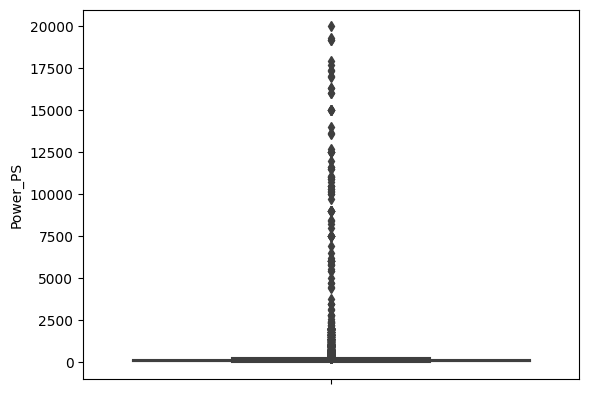

In [28]:
sns.boxplot(y=data["Power_PS"])

* Applying Log transformation to make it more readable

In [29]:
def make_nonzero(x):
  if x==0:
    return 1
  return x

In [30]:
data["Power_PS"]=data["Power_PS"].apply(make_nonzero)

<ipython-input-30-30c711dc33bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Power_PS"]=data["Power_PS"].apply(make_nonzero)


In [31]:
data["Power_PS"]=data["Power_PS"].apply(np.log)

<ipython-input-31-5677432bb765>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Power_PS"]=data["Power_PS"].apply(np.log)


<Axes: ylabel='Power_PS'>

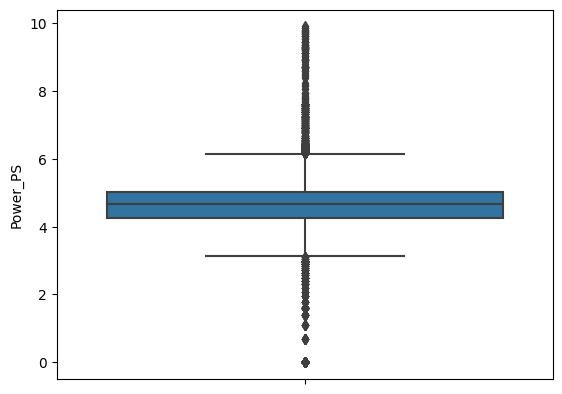

In [32]:
sns.boxplot(y=data["Power_PS"])

In [33]:
data["Power_PS"].value_counts(dropna=False)

0.000000    40720
4.317488    24032
4.094345    15907
5.010635    15442
4.941642    13584
            ...  
7.199678        1
6.659294        1
8.842171        1
7.413970        1
6.335054        1
Name: Power_PS, Length: 792, dtype: int64

In [34]:
data["Kilometer_Driven"].value_counts(dropna=False).sort_index()

5000        6958
10000       1884
20000       5675
30000       6041
40000       6376
50000       7615
60000       8669
70000       9773
80000      11053
90000      12523
100000     15919
125000     38065
150000    240791
Name: Kilometer_Driven, dtype: int64

<Axes: ylabel='Kilometer_Driven'>

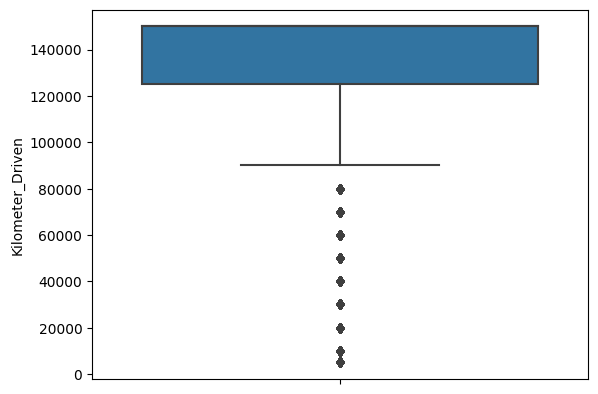

In [35]:
sns.boxplot(y=data["Kilometer_Driven"])

* The cars have driven in the range 5000-150000 kilometers.

In [36]:
data["PostalCode"].value_counts(dropna=False).sort_index()

1067     96
1068      1
1069     59
1097     29
1099     67
         ..
99988     9
99991     2
99994     7
99996     3
99998    16
Name: PostalCode, Length: 8150, dtype: int64

* The given postal code points to location in Germany.
* The German Postal Codes have 5 digits.Here some have 4 values which is explained below
eg: 01067 which is entered as 1067.

In [37]:
data["Car_Price"].describe(percentiles=[0.03,0.11,0.15,0.2,0.25,0.99,0.999,0.9992,0.9999]).to_frame()

,Car_Price
count,3.713420e+05
mean,1.729577e+04
std,3.588851e+06
min,0.000000e+00
3%,1.000000e+00
11%,5.000000e+02
15%,7.000000e+02
20%,9.000000e+02
25%,1.150000e+03
50%,2.950000e+03


In [38]:
data["Car_Price"]=data["Car_Price"].apply(make_nonzero)

<ipython-input-38-5143f1d5805c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Car_Price"]=data["Car_Price"].apply(make_nonzero)


<Axes: ylabel='Car_Price'>

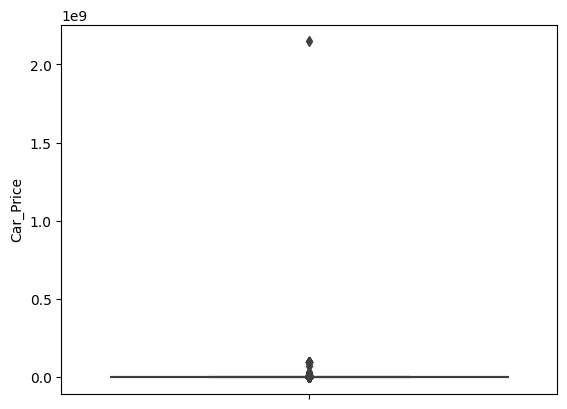

In [39]:
sns.boxplot(y=data["Car_Price"])

* Transforming using Log to do the better visualizing.

In [40]:
data["Car_Price"]=data["Car_Price"].apply(np.log)

<ipython-input-40-40d45dfe6546>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Car_Price"]=data["Car_Price"].apply(np.log)


<Axes: ylabel='Car_Price'>

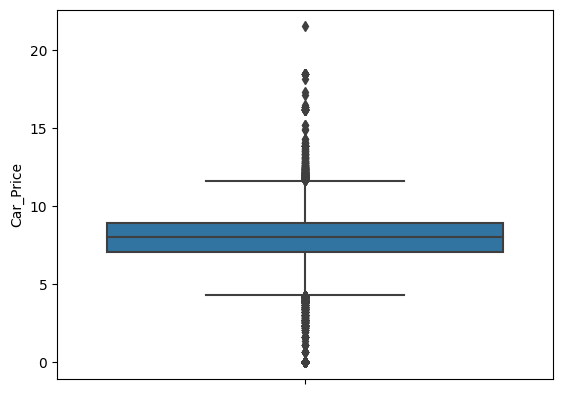

In [41]:
sns.boxplot(y=data["Car_Price"])

* There are possibility of outliers as there is significant price difference between 99.92% and 99.99%.

In [42]:
numeric_features =["Car_Price","Power_PS","Kilometer_Driven"]

## **Analyzing Categorical Features**

In [43]:
categorical_features=['Is_AB_Tested','Vehicle_Type',
      'Gearbox_Type','Fuel_Type', 'Brand',
       'Unrepaired_Damage']

In [44]:
data["Unrepaired_Damage"].value_counts(dropna=False)

nein    263162
NaN      71904
ja       36276
Name: Unrepaired_Damage, dtype: int64

In [45]:
#converting to English words
data["Unrepaired_Damage"]=data["Unrepaired_Damage"].map({'nein':"no","ja":"yes"})

<ipython-input-45-35fe00cf154f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Unrepaired_Damage"]=data["Unrepaired_Damage"].map({'nein':"no","ja":"yes"})


In [46]:
data["Unrepaired_Damage"].value_counts(dropna=False)

no     263162
NaN     71904
yes     36276
Name: Unrepaired_Damage, dtype: int64

* Most of the cars have Unrepaired Damages.

In [47]:
data["Fuel_Type"].value_counts(dropna=False)

benzin     223818
diesel     107737
NaN         33250
lpg          5378
cng           570
hybrid        278
andere        207
elektro       104
Name: Fuel_Type, dtype: int64

In [48]:
#converting to English words
data["Fuel_Type"]=data["Fuel_Type"].replace({'benzin':"petrol","andere":"other","elektro":"electro"})

<ipython-input-48-a78abe47e831>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Fuel_Type"]=data["Fuel_Type"].replace({'benzin':"petrol","andere":"other","elektro":"electro"})


In [49]:
data["Fuel_Type"].value_counts(dropna=False)

petrol     223818
diesel     107737
NaN         33250
lpg          5378
cng           570
hybrid        278
other         207
electro       104
Name: Fuel_Type, dtype: int64

* Most of the cars have petrol or diesel as FuelTypes.

In [50]:
data["Gearbox_Type"].value_counts(dropna=False)

manuell      274183
automatik     77094
NaN           20065
Name: Gearbox_Type, dtype: int64

In [51]:
#converting to English words
data["Gearbox_Type"]=data["Gearbox_Type"].replace({'manuell':"manual","automatik":"automatic"})

<ipython-input-51-9a4e7eb2aa29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Gearbox_Type"]=data["Gearbox_Type"].replace({'manuell':"manual","automatik":"automatic"})


In [52]:
data["Gearbox_Type"].value_counts(dropna=False)

manual       274183
automatic     77094
NaN           20065
Name: Gearbox_Type, dtype: int64

In [53]:
data["Is_AB_Tested"].value_counts(dropna=False)

test       192489
control    178853
Name: Is_AB_Tested, dtype: int64

* Here we can see almost equal portions of sample are in control group and test group .
* We will modify this variable as ..
 - control group to be renamed as "no" pointing its not included in testing group.
 - test group to be renamed as "yes" pointing its included in testing group.  

In [54]:
#convert to categories
data["Is_AB_Tested"]=data["Is_AB_Tested"].replace({"test":"yes","control":"no"})

<ipython-input-54-ae949921dcb6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Is_AB_Tested"]=data["Is_AB_Tested"].replace({"test":"yes","control":"no"})


In [55]:
data["Is_AB_Tested"].value_counts(dropna=False)

yes    192489
no     178853
Name: Is_AB_Tested, dtype: int64

In [56]:
data["Vehicle_Type"].value_counts(dropna=False)

limousine     95894
kleinwagen    80022
kombi         67563
NaN           37687
bus           30201
cabrio        22898
coupe         19013
suv           14707
andere         3357
Name: Vehicle_Type, dtype: int64

In [57]:
data["Vehicle_Type"]=data["Vehicle_Type"].replace({"limousine":"limousine","kleinwagen":"small_car","kombi":"station_wagon","cabrio":"convertible","andere":"other"})

<ipython-input-57-121a9bd843e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Vehicle_Type"]=data["Vehicle_Type"].replace({"limousine":"limousine","kleinwagen":"small_car","kombi":"station_wagon","cabrio":"convertible","andere":"other"})


In [58]:
data["Vehicle_Type"].value_counts(dropna=False)

limousine        95894
small_car        80022
station_wagon    67563
NaN              37687
bus              30201
convertible      22898
coupe            19013
suv              14707
other             3357
Name: Vehicle_Type, dtype: int64

In [59]:
data["Brand"].value_counts(dropna=False)

volkswagen        79603
bmw               40258
opel              40117
mercedes_benz     35294
audi              32868
ford              25568
renault           17965
peugeot           11025
fiat               9670
seat               7020
mazda              5689
skoda              5639
smart              5249
citroen            5179
nissan             5037
toyota             4694
sonstige_autos     3944
hyundai            3645
mini               3393
volvo              3327
mitsubishi         3058
honda              2836
kia                2555
alfa_romeo         2343
suzuki             2327
porsche            2212
chevrolet          1842
chrysler           1451
dacia               900
jeep                806
daihatsu            806
subaru              776
land_rover          769
jaguar              621
trabant             587
daewoo              542
saab                529
rover               489
lancia              484
lada                225
Name: Brand, dtype: int64

In [60]:
data["Brand"].nunique()

40

* There are 40 brands of the cars in the dataset .

In [61]:
data["Car_Model"].value_counts(dropna=False)

golf               30056
andere             26378
3er                20562
NaN                20404
polo               13089
                   ...  
serie_2                8
rangerover             6
serie_3                4
serie_1                2
discovery_sport        1
Name: Car_Model, Length: 252, dtype: int64

In [62]:
data["Car_Model"]=data["Car_Model"].replace({"andere":"other"})

<ipython-input-62-d0bfdcfb4c71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Car_Model"]=data["Car_Model"].replace({"andere":"other"})


In [63]:
#get sorted names of car models
car_models=sorted(data["Car_Model"].unique().astype(str))

In [64]:
print(car_models)

['100', '145', '147', '156', '159', '1_reihe', '1er', '200', '2_reihe', '300c', '3_reihe', '3er', '4_reihe', '500', '5_reihe', '5er', '601', '6_reihe', '6er', '7er', '80', '850', '90', '900', '9000', '911', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a8', 'a_klasse', 'accord', 'agila', 'alhambra', 'almera', 'altea', 'amarok', 'antara', 'arosa', 'astra', 'auris', 'avensis', 'aveo', 'aygo', 'b_klasse', 'b_max', 'beetle', 'berlingo', 'bora', 'boxster', 'bravo', 'c1', 'c2', 'c3', 'c4', 'c5', 'c_klasse', 'c_max', 'c_reihe', 'caddy', 'calibra', 'captiva', 'carisma', 'carnival', 'cayenne', 'cc', 'ceed', 'charade', 'cherokee', 'citigo', 'civic', 'cl', 'clio', 'clk', 'clubman', 'colt', 'combo', 'cooper', 'cordoba', 'corolla', 'corsa', 'cr_reihe', 'croma', 'crossfire', 'cuore', 'cx_reihe', 'defender', 'delta', 'discovery', 'discovery_sport', 'doblo', 'ducato', 'duster', 'e_klasse', 'elefantino', 'eos', 'escort', 'espace', 'exeo', 'fabia', 'fiesta', 'focus', 'forester', 'forfour', 'fortwo', 'fox', 'free

* There are 252 car models.

In [65]:
data["Car_Name"].value_counts().sort_index()

!!!!!!!!!!!!!!!!!!!!!!!!__GOLF_3_CABRIO___!!!!!!!!!!!!!!!!!!!!!!!     1
!!!!!!!!!!!!!!!!_VERKAUFE_OPEL_CORSA_B_!!!!!!!!!!!!!!!                1
!!!!!!!!!!!!!!Renault_Clio_5_Tuerig_Servolenkung_!!!!!!!!!!!!!!!!!    1
!!!!!!!!!!!!!!_Suche_Opel_Astra_G_!!!!!!!!!!!!!!!!!!!!!!!!!!!         2
!!!!!!!!!!!!_Seat_Toledo_1M_!!!!!!!!!!!                               1
                                                                     ..
Öpel_Kadet_1_4i                                                       1
×NISSAN_MICRA×__1.0_top_gepflegt!_Wenig_Kilometer!                    1
Über_ein_Jahr_fahrspass_mit_faltdach                                  1
Übergangsauto                                                         1
Übernahme_Leasingvertrag                                              1
Name: Car_Name, Length: 233369, dtype: int64

In [66]:
data[data["Car_Name"].map(lambda x:len(x)>100)]

,Car_Name,Car_Price,Is_AB_Tested,Vehicle_Type,Registration_Year,Gearbox_Type,Power_PS,Car_Model,Kilometer_Driven,Registration_Month,Fuel_Type,Brand,Unrepaired_Damage,PostalCode
112845,Sehr_Schoener_VW_Lupo_1_4_Sport__Bildschoene_O...,9.898475,no,suv,2010,automatic,5.176150,x_reihe,125000,1,diesel,bmw,no,86441
142235,"""SUCHE_OPEL_VECTRA_B.""SUCHE"",privat,Angebot,0,...",8.294050,yes,station_wagon,2006,manual,4.624973,octavia,150000,10,petrol,skoda,NaN,22159


dropping the two columns which has invalid car Name

In [67]:
data=data[~(data["Car_Name"].map(lambda x:len(x)>100))]

In [68]:
def get_modelandbrand(x):
  val = x.strip("!_")
  result=val.split("_")
  result=[ (re.sub(r"[^a-zA-Z0-9]+", '.', x)) for x in result[:2]]
  return "_".join(sorted(result))

In [69]:
data["Car_Name"]=data["Car_Name"].apply(get_modelandbrand)

In [70]:
data["Car_Name"].value_counts()

Benz_Mercedes      23579
Golf_Volkswagen    13898
Corsa_Opel          9360
Astra_Opel          8355
A4_Audi             8126
                   ...  
D5_Volvo               1
Ford_Streeka           1
FORD_KA.1              1
520da_top              1
defekt_turbo           1
Name: Car_Name, Length: 30585, dtype: int64

* We can have it now as it may be useful in the later stages .

In [71]:
#cleaned data
data.sample(5)

,Car_Name,Car_Price,Is_AB_Tested,Vehicle_Type,Registration_Year,Gearbox_Type,Power_PS,Car_Model,Kilometer_Driven,Registration_Month,Fuel_Type,Brand,Unrepaired_Damage,PostalCode
345363,Ford_Ka,5.808142,yes,small_car,2002,manual,0.000000,ka,125000,11,petrol,ford,yes,99625
215386,C70_Volvo,9.305651,yes,convertible,2007,manual,4.941642,c_reihe,100000,9,petrol,volvo,no,38667
62972,Golf_VW,0.000000,yes,small_car,1987,NaN,0.000000,golf,150000,0,petrol,volkswagen,NaN,2625
159255,Octavia_Skoda,7.649693,yes,station_wagon,2003,manual,4.624973,octavia,150000,0,lpg,skoda,no,31061
25073,Lupo_Volkswagen,6.309918,no,small_car,2000,manual,3.912023,lupo,150000,2,petrol,volkswagen,no,49661


# **Exploratory Data Analysis**
* Univariate Numerical Analysis
* Univariate Categorical Analysis
* Datetime Features
* MultiVariate Numerical Analysis
* Target Vs Categorical Features

## **Univariate Numerical Analysis**

In [72]:
def plot_univariate_numerical(df,col):
   sns.boxplot(data=df,y=col)
   plt.title(col)
   plt.show()

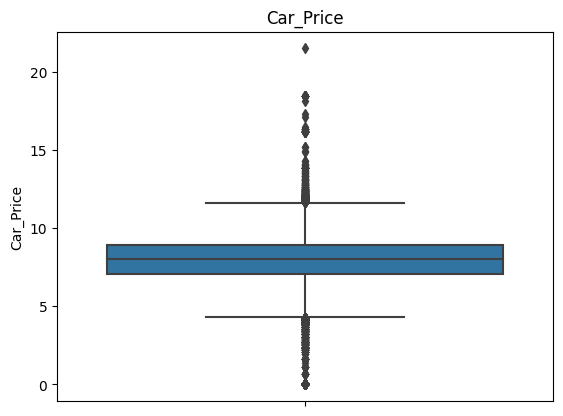

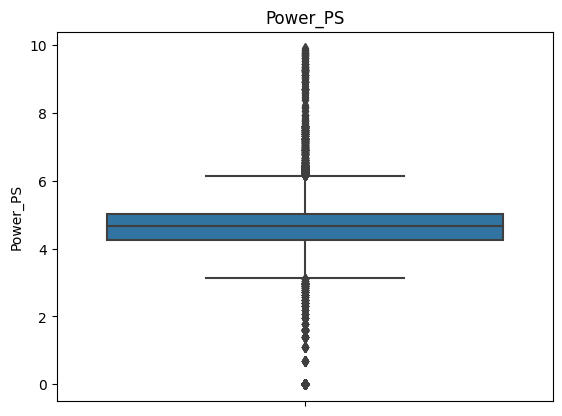

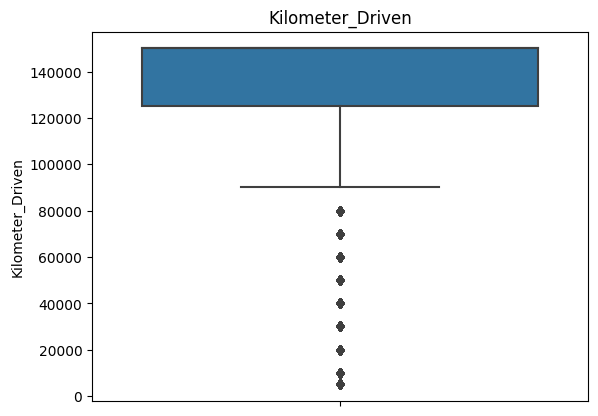

In [73]:
for col in numeric_features:
  plot_univariate_numerical(data,col)
  data[col].skew()

*  Power Ps ,Car Price and Kilometer Driven has potential outliers.

## **Univariate Categorical Analysis**

In [74]:
def plot_univariate_categorical(data,cols):
  fig, ax = plt.subplots(1,3,constrained_layout = True,figsize=(15, 10))
  sns.countplot(x=data[cols[0]], ax=ax[0])
  ax[0].tick_params(axis='x', rotation=90)
  sns.countplot(x=data[cols[1]], ax=ax[1])
  ax[1].tick_params(axis='x', rotation=90)
  sns.countplot(x=data[cols[2]], ax=ax[2])
  ax[2].tick_params(axis='x', rotation=90)

In [75]:
categorical_features

['Is_AB_Tested',
 'Vehicle_Type',
 'Gearbox_Type',
 'Fuel_Type',
 'Brand',
 'Unrepaired_Damage']

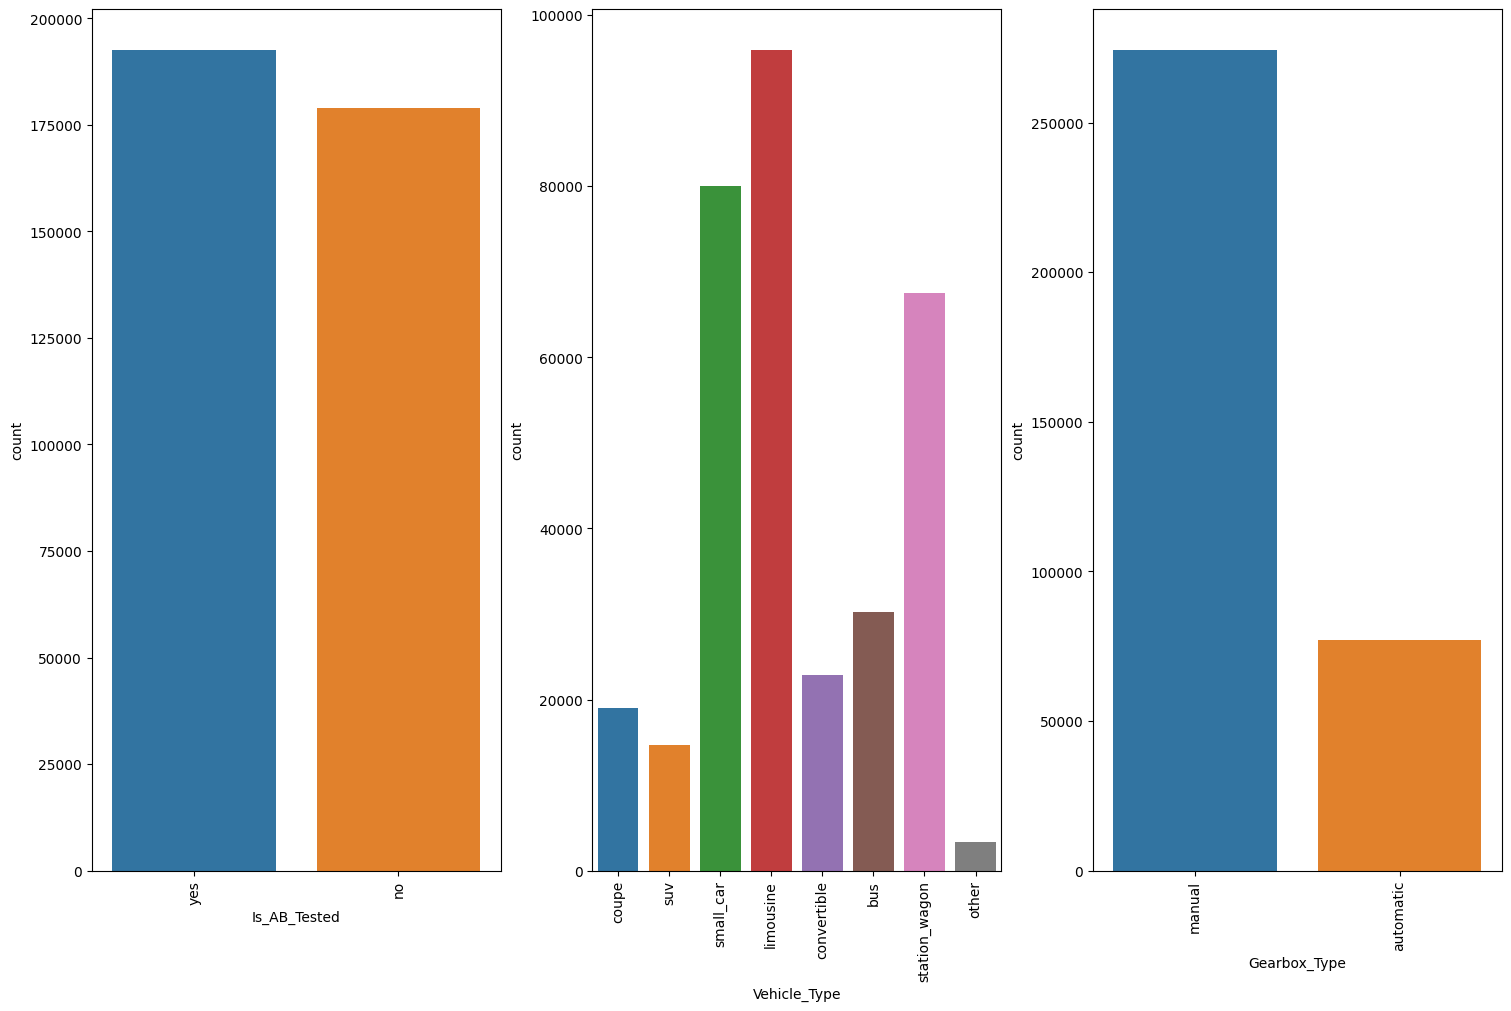

In [76]:
plot_univariate_categorical(data,categorical_features[:3])

* Most of the vehcile types are limousine,small car
* Most of the gear box are manual.

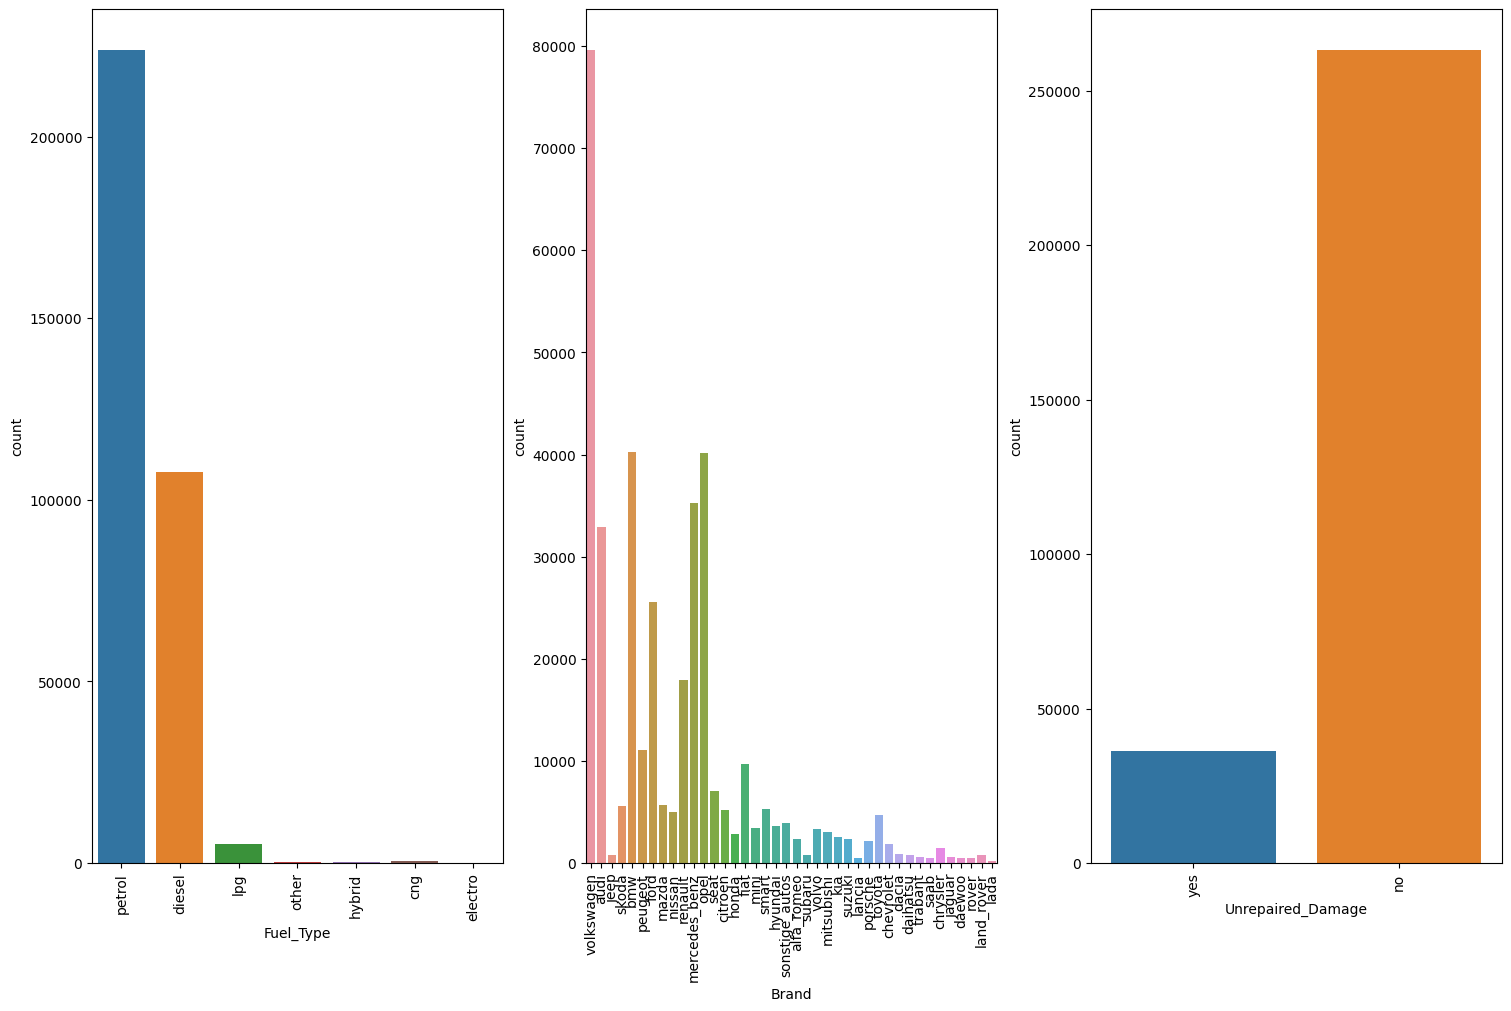

In [77]:
plot_univariate_categorical(data,categorical_features[3:])

* Most of the cars are Volkswagen,mercedes_benz,bmw.
* There are some cars which run on lpg

## **Datetime Features**

In [78]:
def plot_univariate_date(df,col):
   sns.boxplot(data=df,y=col)
   plt.title(col)
   plt.show()

In [79]:
date_features=["Registration_Year","Registration_Month"]

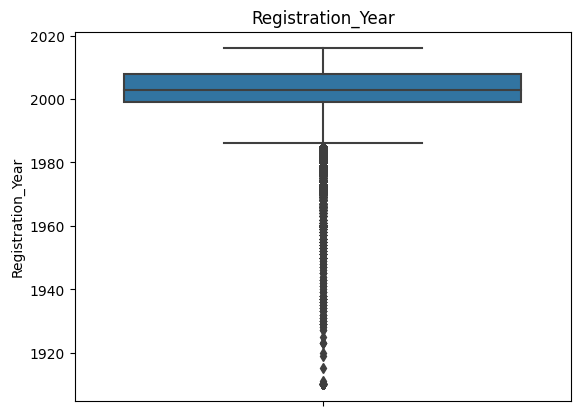

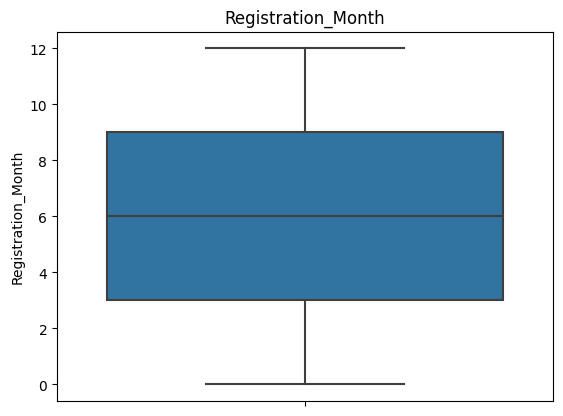

In [80]:
for col in date_features:
  plot_univariate_date(data,col)

* There are some cars that has been registered before 1980 as most of the cars in the dataset are registered after 1980.

## **MultiVariate Numerical Analysis**

<ipython-input-81-4f9672945285>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu", annot=True,fmt = '.2f',linewidth=1)


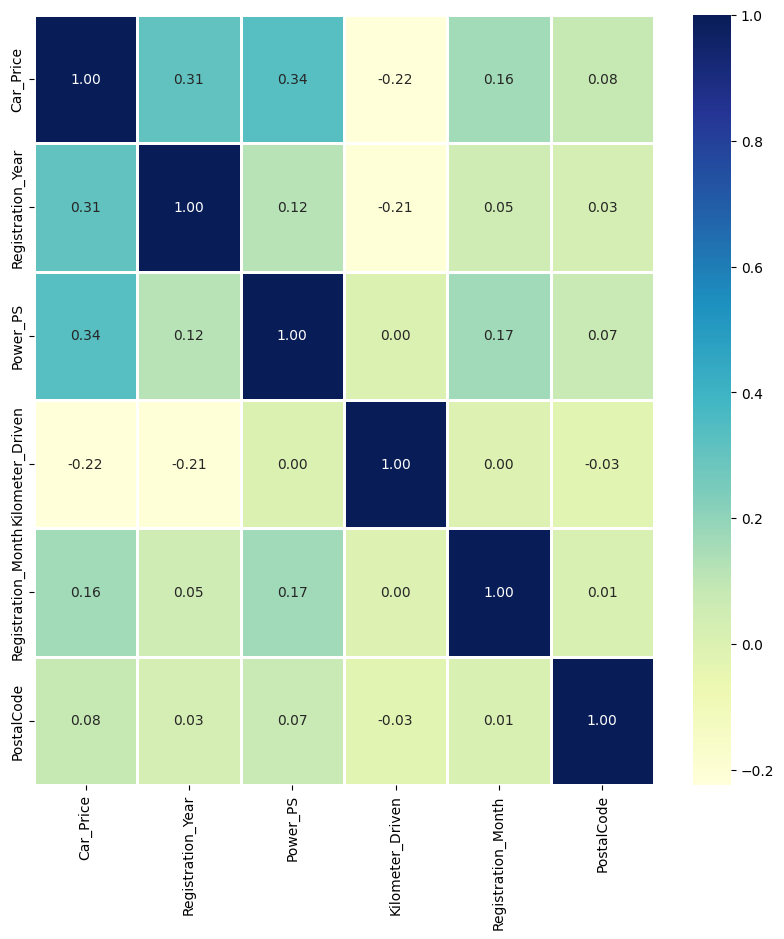

In [81]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True,fmt = '.2f',linewidth=1)
plt.show()

* Kilometer Driven has very slight correlation with Registration Year,CarPrice.
* Lots of correlation among date features.
* Car Price has positive correlation with PowerPS,Registration Year.

## **Target Vs Categorical Features**

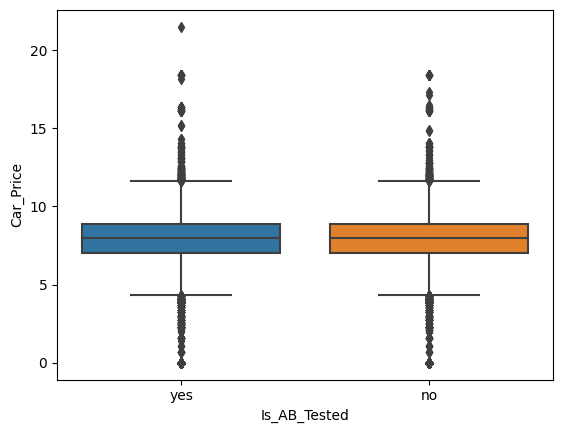

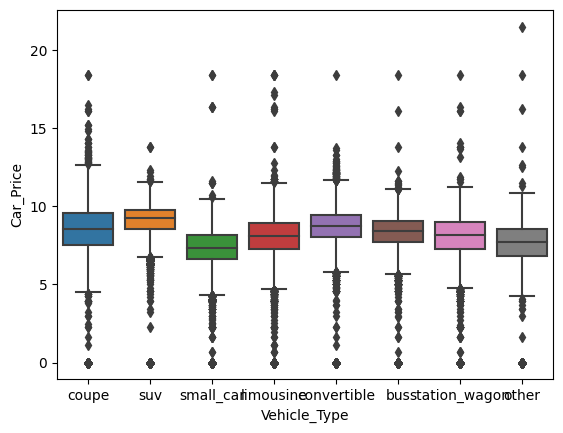

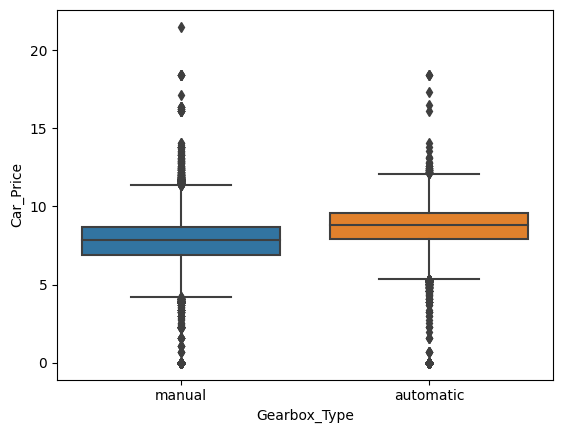

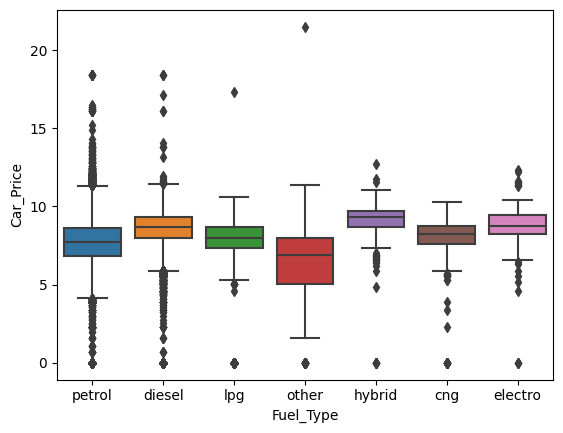

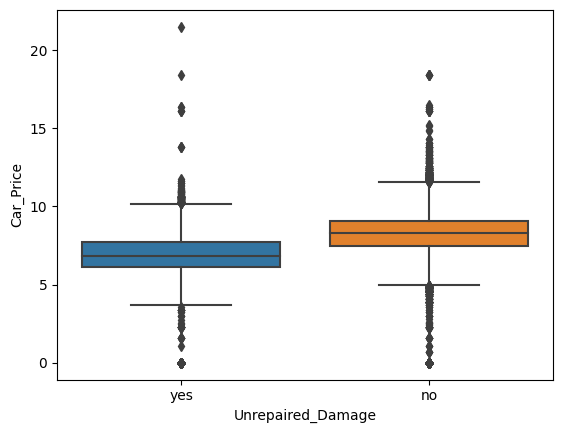

In [82]:
for column in categorical_features:
    if data[column].nunique() < 10:
        sns.boxplot(x=column, y='Car_Price', data=data)
        plt.show()

In [83]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 10:
        display(data.groupby(column)['Car_Price'].agg(['mean','std']).apply(np.exp))

,mean,std
Is_AB_Tested,,
no,2318.067072,6.406222
yes,2302.132172,6.529032


,mean,std
Vehicle_Type,,
bus,3785.283144,4.238008
convertible,5434.590209,4.632932
coupe,4093.511172,7.380257
limousine,2746.012414,5.322536
other,1422.322859,9.833861
small_car,1355.373205,4.847185
station_wagon,2768.238207,5.307891
suv,8125.404902,4.279265


,mean,std
Gearbox_Type,,
automatic,5168.752683,5.351771
manual,2060.933938,5.594198


,mean,std
Fuel_Type,,
cng,2842.887818,4.605634
diesel,4928.541615,4.270885
electro,5375.913132,7.653572
hybrid,7727.367506,5.683621
lpg,2395.190113,5.052646
other,350.133087,29.176666
petrol,1952.564872,5.759987


,mean,std
Unrepaired_Damage,,
no,3539.703522,4.406595
yes,720.466883,7.671862


* Most of the categories have mean prices of arround 6-8 log units which is arround 400 - 4000 euros.
* Convertible and SUV vehicle Type cars are costlier.
* Hybrid Fuel Type cars are costlier
* Automatic Gear Box type of cars are coslier.

# **Preprocessing**

* Missing Value treatment .
* Outlier Detection and Treatment .

## **Missing Value Treatment**

In [84]:
data.isna().sum()

Car_Name                  0
Car_Price                 0
Is_AB_Tested              0
Vehicle_Type          37687
Registration_Year         0
Gearbox_Type          20065
Power_PS                  0
Car_Model             20404
Kilometer_Driven          0
Registration_Month        0
Fuel_Type             33250
Brand                     0
Unrepaired_Damage     71903
PostalCode                0
dtype: int64

* Vehicle Type,Gearbo_Type,Car_Model,Fuel_Type,Unrepaired_Damage columns have missing values .

In [85]:
# converting all the categorical missing values to unknown category
data["Vehicle_Type"]=data["Vehicle_Type"].fillna("Unknown")
data["Car_Model"]=data["Car_Model"].fillna("Unknown")
data["Fuel_Type"]=data["Fuel_Type"].fillna("Unknown")
data["Unrepaired_Damage"]=data["Unrepaired_Damage"].fillna("Unknown")
data["Gearbox_Type"]=data["Gearbox_Type"].fillna("Unknown")

In [86]:
data.isna().sum()

Car_Name              0
Car_Price             0
Is_AB_Tested          0
Vehicle_Type          0
Registration_Year     0
Gearbox_Type          0
Power_PS              0
Car_Model             0
Kilometer_Driven      0
Registration_Month    0
Fuel_Type             0
Brand                 0
Unrepaired_Damage     0
PostalCode            0
dtype: int64

# **Data Analysis**

## **Expensive brands by price**

In [87]:
#Getting median of the data
data.groupby(['Brand'])['Car_Price'].median().apply(np.exp).sort_values(ascending=False)

Brand
porsche           29999.000000
land_rover        12500.000000
mini               8500.000000
jeep               7000.000000
jaguar             6000.000000
audi               5600.000000
bmw                5500.000000
mercedes_benz      4950.000000
skoda              4900.000000
dacia              4800.000000
sonstige_autos     4500.000000
chevrolet          4400.000000
toyota             4000.000000
hyundai            3950.000000
kia                3600.000000
suzuki             2990.000000
volkswagen         2800.000000
smart              2800.000000
seat               2599.000000
volvo              2550.000000
lada               2500.000000
citroen            2499.000000
saab               2499.000000
mazda              2300.000000
alfa_romeo         2299.000000
chrysler           2250.000000
honda              2250.000000
peugeot            2200.000000
nissan             2000.000000
subaru             1700.000000
ford               1699.000000
mitsubishi         1522.333735
op

## **Is Automatic GearBox Type has Statistically significant difference of Price compared to Manual**

In [88]:

manual_gear=data[data["Gearbox_Type"]=="manual"]['Car_Price']
automatic_gear=data[data["Gearbox_Type"]=="automatic"]['Car_Price']

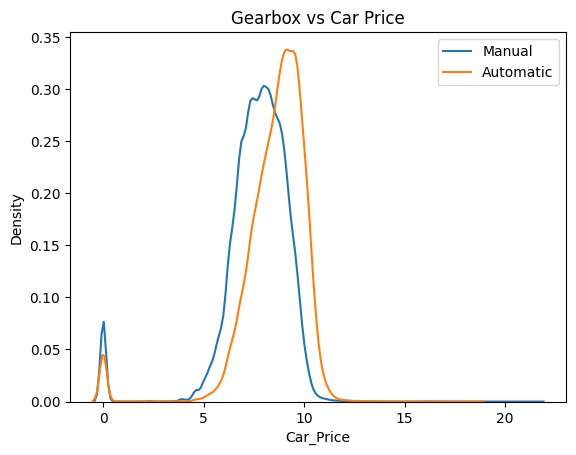

In [89]:
sns.kdeplot(manual_gear,label='Manual')
sns.kdeplot(automatic_gear,label='Automatic')
plt.legend()
plt.title('Gearbox vs Car Price')
plt.show()

* Here we observe slight overlap in car prices but mean of automatic is greater than manual gear box.
* To evaluate whether there is diference in price ranges of different gear  box type we will use central limit theorem .

In [90]:
sample_mean_trend_manual = []
sample_mean_trend_automatic = []
num_samples = 1000
sample = data.sample(num_samples)
for i in range(100):
 sample_now= np.random.choice(data["Car_Price"].index, size=num_samples)
 inter_data= data.loc[sample_now]
 sample_mean_manual= inter_data[inter_data["Gearbox_Type"]=="manual"]["Car_Price"].mean()
 sample_mean_automatic=inter_data[inter_data["Gearbox_Type"]=="automatic"]["Car_Price"].mean()
 sample_mean_trend_manual.append(np.exp(sample_mean_manual))
 sample_mean_trend_automatic.append(np.exp(sample_mean_automatic))

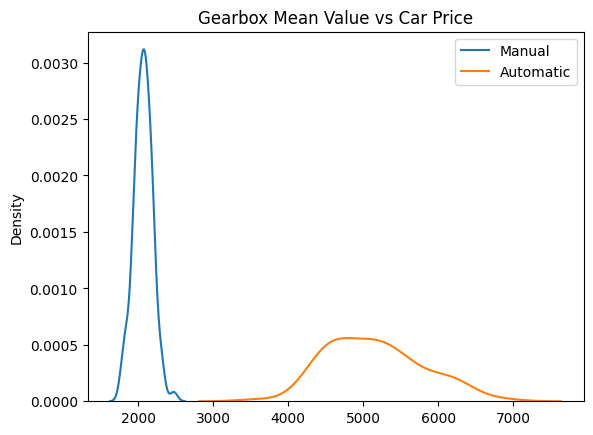

In [91]:
sns.kdeplot(sample_mean_trend_manual,label='Manual')
sns.kdeplot(sample_mean_trend_automatic,label='Automatic')
plt.legend()
plt.title('Gearbox Mean Value vs Car Price')
plt.show()

* Here we observe there is significant change in the mean values of car prices for different gear box type.

In [92]:
print("Manual GearBox: " ,"Sample Mean :",round(np.mean(sample_mean_trend_manual),2),"Sample std",round(np.std(sample_mean_trend_manual),2))

Manual GearBox:  Sample Mean : 2063.51 Sample std 122.61


In [93]:
print("Automatic GearBox: " ,"Sample Mean :",round(np.mean(sample_mean_trend_automatic),2),"Sample std",round(np.std(sample_mean_trend_automatic),2))

Automatic GearBox:  Sample Mean : 5150.97 Sample std 633.31


In [94]:
z=round(norm.ppf(0.95),2)
print("Z- value",z)

Z- value 1.64


In [95]:
sample_mu_m=round(np.mean(sample_mean_trend_manual),2)
sample_std_m=round(np.std(sample_mean_trend_manual),2)

In [96]:
print("CI at 95% for Population mean -manual",[round(sample_mu_m-(z*sample_std_m),2),round(sample_mu_m+(z*sample_std_m),2)])

CI at 95% for Population mean -manual [1862.43, 2264.59]


In [97]:
sample_mu_a=round(np.mean(sample_mean_trend_automatic),2)
sample_std_a=round(np.std(sample_mean_trend_automatic),2)

In [98]:
print("CI at 95% for Population mean -automatic",[round(sample_mu_a-(z*sample_std_a),2),round(sample_mu_a+(z*sample_std_a),2)])

CI at 95% for Population mean -automatic [4112.34, 6189.6]


**INSIGHTS**
* There is a clear difference between the mean of Manual and automatic GearBox Types with respect to Car Price at 95% confidence level .
* CI at 95% for Population mean -manual [1854.49, 2305.69] Euros .
* CI at 95% for Population mean -automatic [4287.32, 6243.08] Euros.

## **Is_AB_Tested Have effect on Car Price**

In [99]:
test=data[data["Is_AB_Tested"]=="yes"]['Car_Price']
control=data[data["Is_AB_Tested"]=="no"]['Car_Price']

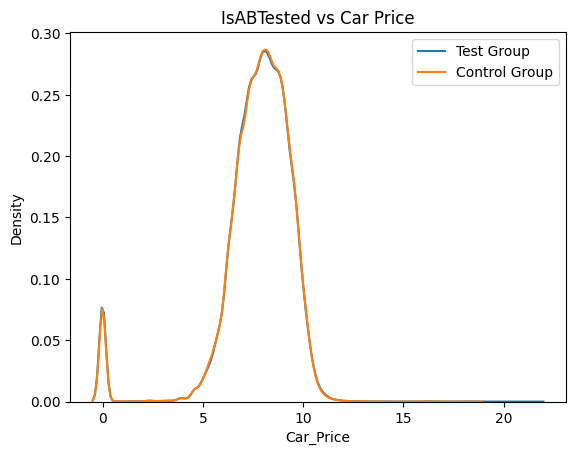

In [100]:
sns.kdeplot(test,label='Test Group')
sns.kdeplot(control,label='Control Group')
plt.legend()
plt.title('IsABTested vs Car Price')
plt.show()

* There is complete overlap seen in both the groups.
* Hence Car Price is not affected by TestGroup or Control Group .

## **Does FuelType Have Effect on Price**

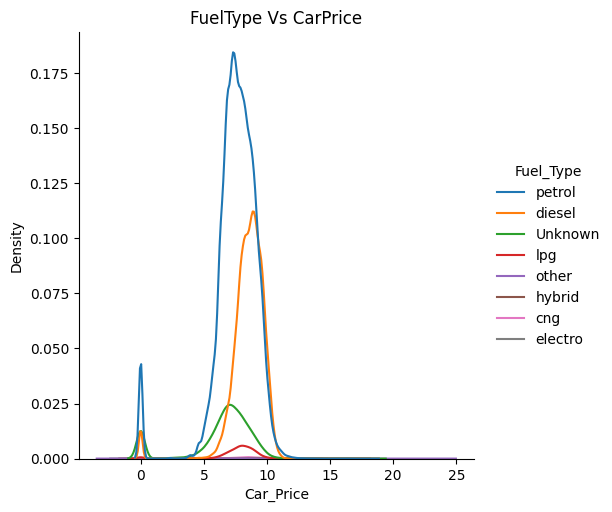

In [101]:
sns.displot(data=data,x='Car_Price',hue='Fuel_Type',kind="kde")
plt.title("FuelType Vs CarPrice")
plt.show()

* We can see some difference in mean price of cars but to check whether the difference is statistcally significant we carry out hypothesis testing .

In [102]:
petrol=data[data["Fuel_Type"]=="petrol"]['Car_Price']
diesel=data[data["Fuel_Type"]=="diesel"]['Car_Price']
hybrid=data[data["Fuel_Type"]=="hybrid"]['Car_Price']
electro=data[data["Fuel_Type"]=="electro"]['Car_Price']
lpg=data[data["Fuel_Type"]=="lpg"]['Car_Price']
cng=data[data["Fuel_Type"]=="cng"]['Car_Price']

* **Null Hypothesis(H0)** - There is no difference in average Car_Price on different FuelTypes.
* **Alternate Hypothesis(Ha)** - There is difference in average CarPrice on different FuelType.
* **Appropriate Test** - ANOVA
* **Test Assumptions**
 - Population data must be normal.
 - Data group should have equal variance.

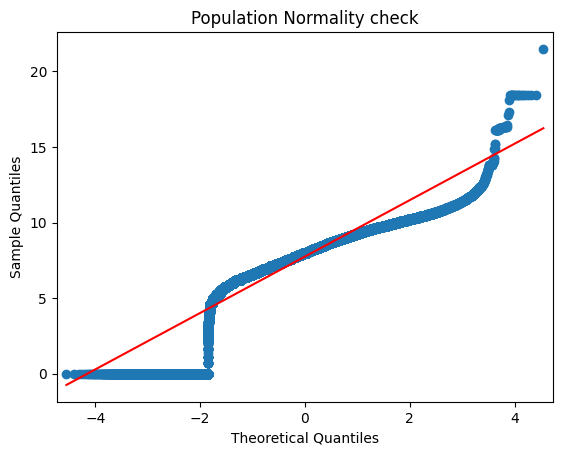

In [103]:
pop=data['Car_Price']
qqplot(pop,line="s")
plt.title("Population Normality check")
plt.show()

*  Clearly population is not normal

**Variance check -Levene test**
- Null Hypothesis(H0) - Variance equal for all groups.
- Alternate Hypothesis(Ha) -Variance not equal for all groups.
- Significance level - 0.05(5%)

In [104]:
levene(petrol,diesel,lpg,cng,hybrid,electro)

LeveneResult(statistic=654.5706442549911, pvalue=0.0)

* As P Value is less than 0.05 we reject saying variance is not same across group.
* Hence ANOVA cannot be used.
* We will use Non-Parametric test .
* **Kruskal-Wallis Test**
* **Null Hypothesis(H0)** - There is no difference in average Car_Price on different FuelTypes.
* **Alternate Hypothesis(Ha)** - There is difference in average CarPrice on different FuelType.
* **Appropriate Test** - Kruskal-WallisTest
* **Test Assumptions**
 - Population data need not be normal.
 - Data group need not be of same variance.

In [105]:
test_stat,p_value=kruskal(petrol,diesel,lpg,cng,hybrid,electro)
print("p_value",p_value)

p_value 0.0


* Clearly there is difference is average car price on different fuel types.

In [106]:
#FuelType vs Price
sample_mean_trend_petrol = []
sample_mean_trend_diesel = []
sample_mean_trend_lpg = []
sample_mean_trend_cng = []
sample_mean_trend_hybrid = []
sample_mean_trend_electro = []

num_samples = 100000
sample = data.sample(num_samples)
for i in range(100):
 sample_now= np.random.choice(data["Car_Price"].index, size=num_samples)
 inter_data= data.loc[sample_now]
 sample_mean_petrol= inter_data[inter_data["Fuel_Type"]=="petrol"]["Car_Price"].mean()
 sample_mean_lpg= inter_data[inter_data["Fuel_Type"]=="lpg"]["Car_Price"].mean()
 sample_mean_cng= inter_data[inter_data["Fuel_Type"]=="cng"]["Car_Price"].mean()
 sample_mean_hybrid= inter_data[inter_data["Fuel_Type"]=="hybrid"]["Car_Price"].mean()
 sample_mean_electro= inter_data[inter_data["Fuel_Type"]=="electro"]["Car_Price"].mean()
 sample_mean_diesel=inter_data[inter_data["Fuel_Type"]=="diesel"]["Car_Price"].mean()
 sample_mean_trend_petrol.append(sample_mean_petrol)
 sample_mean_trend_diesel.append(sample_mean_diesel)
 sample_mean_trend_electro.append(sample_mean_electro)
 sample_mean_trend_lpg.append(sample_mean_lpg)
 sample_mean_trend_cng.append(sample_mean_cng)
 sample_mean_trend_hybrid.append(sample_mean_hybrid)

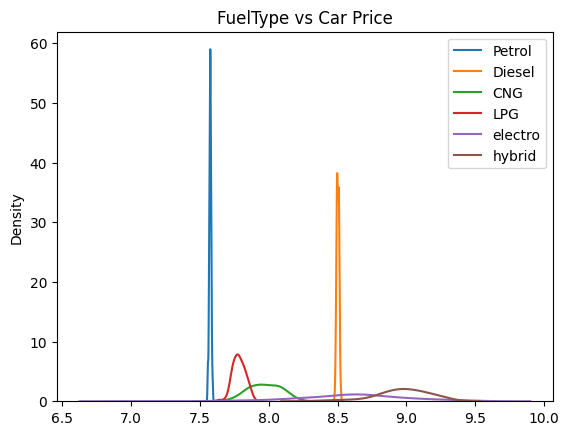

In [107]:
sns.kdeplot(sample_mean_trend_petrol,label='Petrol')
sns.kdeplot(sample_mean_trend_diesel,label='Diesel')
sns.kdeplot(sample_mean_trend_cng,label='CNG')
sns.kdeplot(sample_mean_trend_lpg,label='LPG')
sns.kdeplot(sample_mean_trend_electro,label='electro')
sns.kdeplot(sample_mean_trend_hybrid,label='hybrid')
plt.legend()
plt.title('FuelType vs Car Price')
plt.show()

* Diesel and Petrol has significant change in Car Price.

In [108]:
sample_mu_p=round(np.mean(sample_mean_trend_petrol),2)
sample_std_p=round(np.std(sample_mean_trend_petrol),2)

In [109]:
print("CI at 95% for Population mean -petrol",[round(np.exp(sample_mu_p-(z*sample_std_p)),2),round(np.exp(sample_mu_p+(z*sample_std_p)),2)])

CI at 95% for Population mean -petrol [1926.77, 1991.02]


In [110]:
sample_mu_d=round(np.mean(sample_mean_trend_diesel),2)
sample_std_d=round(np.std(sample_mean_trend_diesel),2)

In [111]:
print("CI at 95% for Population mean -diesel",[round(np.exp(sample_mu_d-(z*sample_std_d)),2),round(np.exp(sample_mu_d+(z*sample_std_d)),2)])

CI at 95% for Population mean -diesel [4834.82, 4996.04]


In [112]:
sample_mu_c=round(np.mean(sample_mean_trend_cng),2)
sample_std_c=round(np.std(sample_mean_trend_cng),2)

In [113]:
print("CI at 95% for Population mean -cng",[round(np.exp(sample_mu_c-(z*sample_std_c)),2),round(np.exp(sample_mu_c+(z*sample_std_c)),2)])

CI at 95% for Population mean -cng [2415.35, 3464.76]


In [114]:
sample_mu_l=round(np.mean(sample_mean_trend_lpg),2)
sample_std_l=round(np.std(sample_mean_trend_lpg),2)

In [115]:
print("CI at 95% for Population mean -lpg",[round(np.exp(sample_mu_l-(z*sample_std_l)),2),round(np.exp(sample_mu_l+(z*sample_std_l)),2)])

CI at 95% for Population mean -lpg [2203.94, 2596.71]


In [116]:
sample_mu_e=round(np.mean(sample_mean_trend_electro),2)
sample_std_e=round(np.std(sample_mean_trend_electro),2)

In [117]:
print("CI at 95% for Population mean -electro",[round(np.exp(sample_mu_e-(z*sample_std_e)),2),round(np.exp(sample_mu_e+(z*sample_std_e)),2)])

CI at 95% for Population mean -electro [2894.01, 10400.4]


In [118]:
sample_mu_h=round(np.mean(sample_mean_trend_hybrid),2)
sample_std_h=round(np.std(sample_mean_trend_hybrid),2)

In [119]:
print("CI at 95% for Population mean -Hybrid",[round(np.exp(sample_mu_h-(z*sample_std_h)),2),round(np.exp(sample_mu_h+(z*sample_std_h)),2)])

CI at 95% for Population mean -Hybrid [5758.31, 10738.6]


* There is statistical significance across the means of different fuel types.Thus the Car Price differs across the fuel types
* CI at 95% for Population mean of Car Price  - petrol [1926.77, 1991.02].
* CI at 95% for Population mean of Car Price -lpg  [2240.38, 2554.47].
* CI at 95% for Population mean of Car Price -cng  [2367.52, 3396.16]
* CI at 95% for Population mean of Car Price -diesel [4834.82, 4996.04] .
* CI at 95% for Population mean of Car Price -Hybrid [5816.19, 10846.52]
* CI at 95% for Population mean of Car Price -electro [2854.92, 9928.85]



## **Vehicle Type vs Car Price**

In [121]:
limousine=data[data["Vehicle_Type"]=="limousine"]['Car_Price']
small_car=data[data["Vehicle_Type"]=="small_car"]['Car_Price']
station_wagon=data[data["Vehicle_Type"]=="station_wagon"]['Car_Price']
bus=data[data["Vehicle_Type"]=="bus"]['Car_Price']
convertible=data[data["Vehicle_Type"]=="convertible"]['Car_Price']
coupe=data[data["Vehicle_Type"]=="coupe"]['Car_Price']
suv=data[data["Vehicle_Type"]=="suv"]['Car_Price']

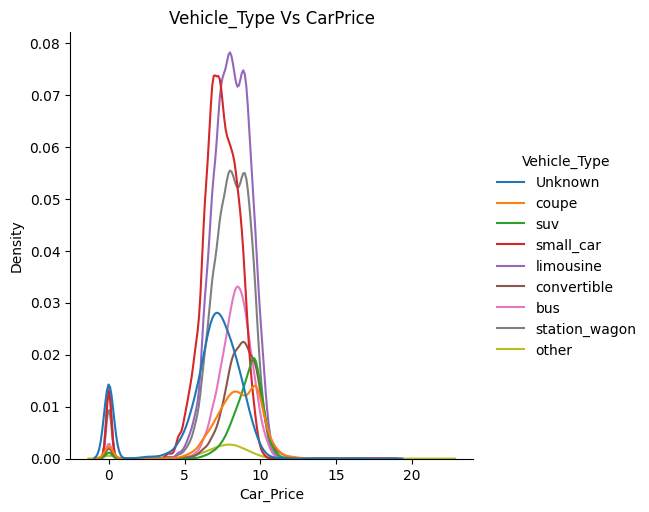

In [122]:
sns.displot(data=data,x='Car_Price',hue='Vehicle_Type',kind="kde")
plt.title("Vehicle_Type Vs CarPrice")
plt.show()

* The graph shows different distirbution and means for each vehicle types.
* Since the Car Priceis not normal using kruskal wallis test to confirm the same.

In [123]:
test_stat,p_value=kruskal(limousine,small_car,suv,coupe,convertible,bus,station_wagon)
print("p_value",p_value)

p_value 0.0


* As p-value is zero there is significant difference in the average of different vehicle types.

## **Unrepaired_Damage vs Car_Price**

In [124]:
un_yes=data[data["Unrepaired_Damage"]=="yes"]['Car_Price']
un_no =data[data["Unrepaired_Damage"]=="no"]['Car_Price']

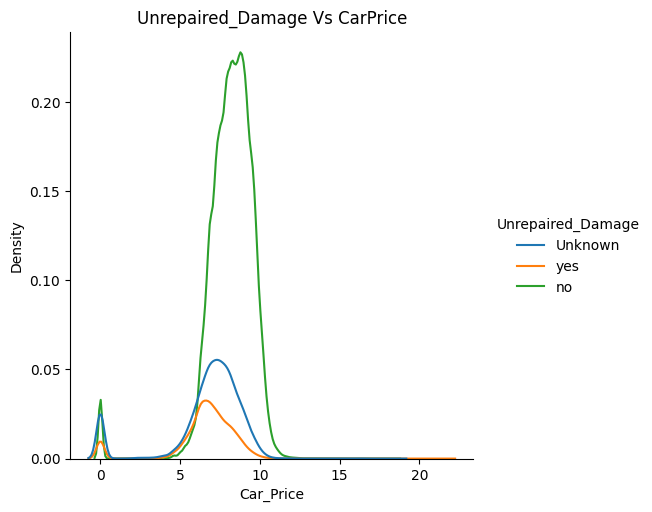

In [125]:
sns.displot(data=data,x='Car_Price',hue='Unrepaired_Damage',kind="kde")
plt.title("Unrepaired_Damage Vs CarPrice")
plt.show()

* There is significant difference in the average mean of unrepaired damages present or not with resppect to car price.

* Since there is only two categorical variable has to be compared against a real variable we can use T-Test.
* But since our real variable is not normal we can use MannWhitney-U test to do the test .

* **MannWhitney-U Test**
* **Null Hypothesis(H0)** - There is no difference in distributions of two different groups
* **Alternate Hypothesis(Ha)** - There is difference in location of distribution of the  groups.
* **Appropriate Test** - MannWhitney-U Test


In [126]:
mannwhitneyu(un_yes,un_no,alternative='less')

MannwhitneyuResult(statistic=2023541019.5, pvalue=0.0)

* As p-value is less than zero car prices of cars having unrepaired damages are higher than cars having damages .

## **Car Model vs Car Pice**

In [127]:
#Getting median of the data
data.groupby(['Car_Model'])['Car_Price'].median().apply(np.exp).sort_values(ascending=False)

Car_Model
911                   50000.000000
discovery_sport       47950.000000
range_rover_evoque    33200.000000
q3                    27964.995977
m_reihe               27894.999552
                          ...     
escort                  550.000000
elefantino              550.000000
move                    500.000000
samara                  300.000000
serie_1                  61.644140
Name: Car_Price, Length: 252, dtype: float64

## **Kilometer Driven Vs Car Price**

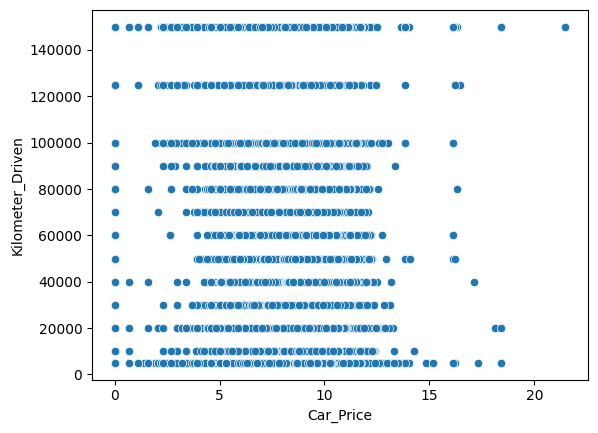

In [128]:
sns.scatterplot(data=data,x='Car_Price',y='Kilometer_Driven')
plt.show()

* No pattern is being observed between car price and kilometer Driven .

* **Null Hypothesis(H0)** - There is no correlation between CarPrice and Kilometer Driven.
* **Alternate Hypothesis(Ha)** - There is correlation (monotonicity) between car Price and kilometer Driven.
* **Appropriate Test** - Spearman rank correlation Test
* **Test Assumptions**
 - non parametric equivalent of pearson rank test.

In [129]:
res=spearmanr(data['Kilometer_Driven'],data['Car_Price'],alternative='less')
res

SignificanceResult(statistic=-0.3742418938642517, pvalue=0.0)

* From the test "alternative=less" signifies the correlation is less than zero.
* So as the kilometer driven increases car price decreases and vice versa.

## **Power_PS vs Car_Price**

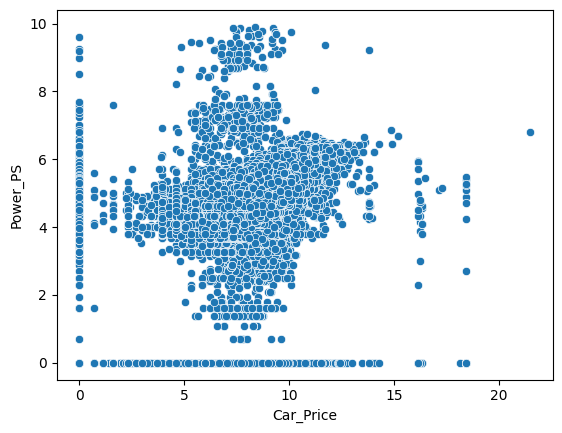

In [130]:
sns.scatterplot(data=data,x='Car_Price',y='Power_PS')
plt.show()

In [131]:
res=spearmanr(data['Power_PS'],data['Car_Price'],alternative='greater')
res

SignificanceResult(statistic=0.5525732805092527, pvalue=0.0)

* As the Spearmanr have value greater 0.5 there is positive correlation .
* This indicates that as the Power_PS increases with increase in Car_Price.

## **Registration Month vs Car_Price**

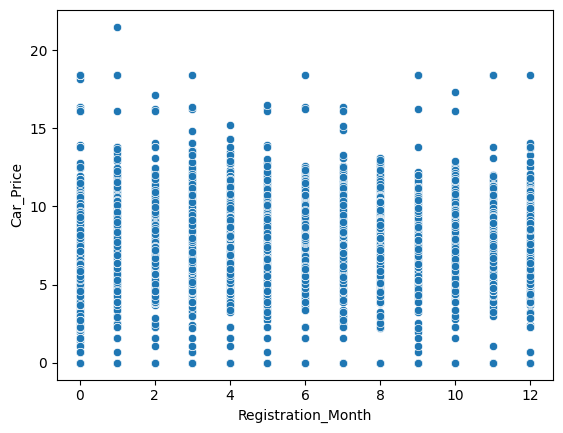

In [132]:
sns.scatterplot(data=data,y='Car_Price',x='Registration_Month')
plt.show()

In [133]:
res=spearmanr(data['Registration_Month'],data['Car_Price'],alternative='greater')
res

SignificanceResult(statistic=0.1501467232345933, pvalue=0.0)

* From the test "alternative=greater" signifies the correlation is greater than zero.
* But since the value is very small its less correlated.(Increase in Registration Month in Car Price).

## **Registration Year vs Car Price**

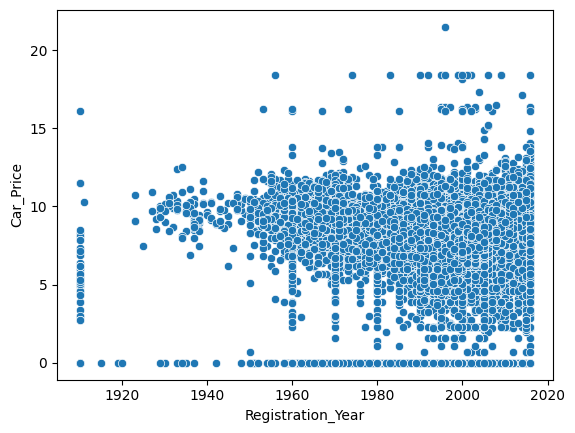

In [134]:
sns.scatterplot(data=data,y='Car_Price',x='Registration_Year')
plt.show()

In [135]:
res=spearmanr(data['Registration_Year'],data['Car_Price'],alternative='greater')
res

SignificanceResult(statistic=0.5622342372840434, pvalue=0.0)

* From the test "alternative=greater" signifies the correlation is greater than zero.
* So as the Registration_Year increases car_price increases and vice versa.

## **Postal Code vs Car Price**

In [136]:
res=spearmanr(data['PostalCode'],data['Car_Price'],alternative='greater')
res

SignificanceResult(statistic=0.09152665797874014, pvalue=0.0)

* From the test "alternative=greater" signifies the correlation is greater than zero.
* But it has no effect on Car Price as its very close to zero.

## **Top 10 CarNames by Price**

In [137]:
#Getting median of the data
data.groupby(['Car_Name'])['Car_Price'].median().apply(np.exp).sort_values(ascending=False)[:10]

Car_Name
AUTOS_Kaufe           2.147484e+09
Goggo_Oldtimer        1.000000e+08
ford_tausche          1.000000e+08
Biete_Hier            1.000000e+08
Golf3_Schlachtfest    1.234568e+07
o_tausche             1.234568e+07
Escort_MK             1.111111e+07
DKW_Tausch            1.111111e+07
Hilfe_Hilfe           1.001001e+07
Motorcross_Suche      1.000000e+07
Name: Car_Price, dtype: float64

**OBSERVATIONS**
* As Car Price increases , Registration Year increases ,Power_PS increases , Kilometer Driven decreases .
* Gearbox types , FuelTypes,Vehicle Types ,Unrepaired Damage features has significant effect on car price .

# **Rule Based Predictions**

* The features which will help in prediction of car prices are
 - Registration Year [1910-2016]
 - Power_PS range
 - Kilometer Driven
 - Gear Box Types [Automatic,Manual]
 - Fuel Types [Petrol,Diesel,cng,lpg,hybrid,electro]
 - Unrepaired Damage [yes,no]
 - Car Brands
 - Vehicle Types [limousine,small_car,station_wagon,bus,convertible,coupe,suv]

In [138]:
#skip unknown values in rows
result=data[~((data['Gearbox_Type']=='Unknown')|(data['Fuel_Type']=='Unknown')|(data['Unrepaired_Damage']=='Unknown')|(data['Vehicle_Type']=='Unknown'))]

In [139]:
#group by category values
cat_pred=result.groupby(['Gearbox_Type','Fuel_Type','Unrepaired_Damage','Brand','Vehicle_Type'])['Car_Price'].median().apply(np.exp).reset_index()

In [140]:
cat_pred.sample(5)

,Gearbox_Type,Fuel_Type,Unrepaired_Damage,Brand,Vehicle_Type,Car_Price
800,automatic,petrol,yes,citroen,other,499.000000
2119,manual,petrol,yes,lada,suv,1100.000000
2073,manual,petrol,yes,daihatsu,other,748.331477
856,automatic,petrol,yes,mercedes_benz,small_car,800.000000
947,automatic,petrol,yes,volvo,limousine,1000.000000


In [ ]:
#group by numeric values
num_pred=result.groupby(['Registration_Year','Power_PS','Kilometer_Driven'])['Car_Price'].median().apply(np.exp).reset_index()

In [ ]:
num_pred.sample(5)

,Registration_Year,Power_PS,Kilometer_Driven,Car_Price
1074,1972,4.219508,100000,8950.000000
12344,2004,4.867534,90000,5750.000000
19020,2010,4.219508,125000,3900.000000
11796,2003,5.700444,90000,14499.000000
10669,2002,5.093750,125000,6577.411345


In [ ]:
def predict(x):
 """
 Get categorical features median price
 Get numeric features median price
 return harmonic mean of the above two
 """
 val=cat_pred[(cat_pred['Gearbox_Type']==x['Gearbox_Type']) & (cat_pred['Fuel_Type']==x['Fuel_Type'])&(cat_pred['Unrepaired_Damage']==x['Unrepaired_Damage']) &(cat_pred['Brand']==x['Brand']) &(cat_pred['Vehicle_Type']==x['Vehicle_Type'])]
 cat_price=val['Car_Price'].values
 val = num_pred[(num_pred['Registration_Year']<=x['Registration_Year']) & (num_pred['Registration_Year']>x['Registration_Year']-2) & (num_pred['Power_PS']<=x['Power_PS'])&(num_pred['Power_PS']>x['Power_PS']-10) & (num_pred['Kilometer_Driven']<=x['Kilometer_Driven'])&(num_pred['Kilometer_Driven']>x['Kilometer_Driven']-1000)]
 numeric_price= val['Car_Price'].mean()
 print(val)
 if not numeric_price:
  return cat_price
 return round((2 *(numeric_price)*(cat_price)/(numeric_price+cat_price))[0],2)


In [ ]:
#get test data by selecting required columns
test=data[['Gearbox_Type','Fuel_Type','Unrepaired_Damage','Brand','Vehicle_Type','Registration_Year','Power_PS','Kilometer_Driven','Car_Price']]
test=test[~((test['Gearbox_Type']=='Unknown')|(test['Fuel_Type']=='Unknown')|(test['Unrepaired_Damage']=='Unknown')|(test['Vehicle_Type']=='Unknown'))]

In [ ]:
#sample 10 data points
sample_test_case=test.sample(10)

In [ ]:
#get original car price value and predicted car price value
y_test=sample_test_case['Car_Price'].apply(np.exp)
y_pred=sample_test_case.apply(predict,axis=1)

In [ ]:
#get the absolute difference
np.abs(y_pred-y_test).sort_values()

121528     240.80
217914     248.76
7935       249.73
62422      366.51
189646     494.39
108835    1122.60
87036     1447.48
107578    5839.50
258917    6243.71
43017     9117.04
dtype: float64